# <span style="color:red"> Numerical Simulation Laboratory</span>
## <span style="color:orange">  Numerical exercises 8: Samuele Voltan's notebook.</span>

In [1]:
# LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import griddata

In [2]:
# FUNCTIONS
def error(AV, AV2, n):
    if n == 0:
        return 0
    return np.sqrt((AV2 - AV*AV) / n)

def block_method_multidim(data):
    sum_prog = 0.
    sum_prog2 = 0.
    y = np.zeros(data[..., 0].shape + (2,))
    for i in range(data.shape[-1]):
        sum_prog = sum_prog + data[..., i]
        sum_prog2 = sum_prog2 + data[..., i]*data[..., i]
        AV = sum_prog / (i+1)
        AV2 = sum_prog2 / (i+1)
        y[..., 0] = AV
        y[..., 1] = error(AV, AV2, i)
    return y

def block_method(data):
    sum_prog = 0.
    sum_prog2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum_prog2 = sum_prog2 + data[i]*data[i]
        AV = sum_prog / (i+1)
        AV2 = sum_prog2 / (i+1)
        y[i, 0] = AV
        y[i, 1] = error(AV, AV2, i)
    return y

def Vpot(x):
    return (x**2 - 2.5)*x**2

In [3]:
data1 = np.loadtxt("data/lab08/ex08.1/ex08.1.out")
grid = np.loadtxt("data/lab08/ex08.2/ex08.2_grid.out")
data2 = np.loadtxt("data/lab08/ex08.2/ex08.2_measure.out")
sample = np.loadtxt("data/lab08/ex08.2/ex08.2_sample.out")
#pigs_trial_prob = np.loadtxt("data/lab08/ex08.3/pigs_trial_probability.out")
#pigs_psi_prob = np.loadtxt("data/lab08/ex08.3/pigs_psi_probability.out")

### <span style="color:red">Exercise 8.1
Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.

### <span style="color:orange">Solution

 <H> = -0.1971 ± 0.0014


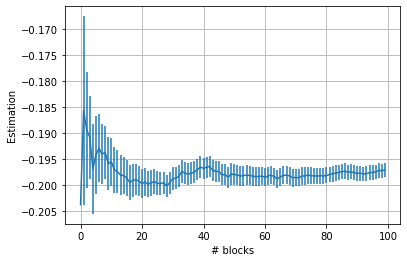

In [4]:
N_blocks = 100
H = block_method(data1)
x = np.arange(N_blocks)
plt.xlabel(r"# blocks")
plt.ylabel("Estimation")
print(f" <H> = {H[-1, 0]:.4f} ± {H[-1, 1]:.4f}")
plt.grid(True)
plt.errorbar(x, H[:, 0], yerr=H[:, 1]);

### <span style="color:red">Exercise 8.2
Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

- As usual, show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- Show also a picture of the sampled $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:orange">Solution

In order to find the minimum energy, I searched in the interval $[\mu = 0.5, \mu = 1)\times[\sigma = 0.5, \sigma = 1)$.

In [5]:
# DEFINITIONS
N_grid = 50
N_blocks = 100
N_throws = 1000
N_throws_sample = 10000
start = 0.5
stop = 1.0
step = (stop - start) / N_grid

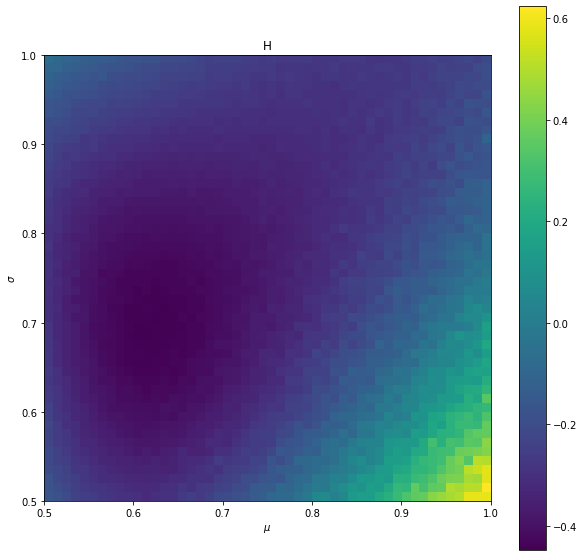

mu = 0.80
sigma = 0.61


In [6]:
grid = block_method_multidim(grid.reshape((N_grid, N_grid, N_blocks)))
plt.figure(figsize=(10, 10))
plt.imshow(grid[..., 0], interpolation='nearest', extent=(start, stop, start, stop));
plt.colorbar()
plt.title("H")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.show()
mins = np.unravel_index(grid[..., 0].argmin(), grid[..., 0].shape)
print(f"mu = {start+mins[0]*step:.2f}\nsigma = {start+mins[1]*step:.2f}")

With the values found, I updated the C++ code in order to estimate the minimum energy with data blocking.

H = -0.4457 ± 0.0008


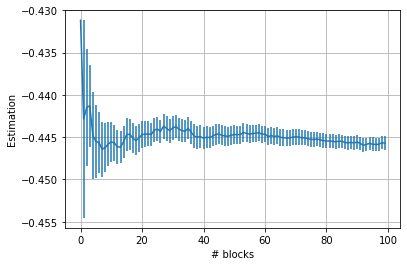

In [7]:
H = block_method(data2)
x = np.arange(N_blocks)
plt.grid()
plt.errorbar(x, H[:, 0], yerr=H[:, 1]);
plt.xlabel(r"# blocks")
plt.ylabel("Estimation")
print(f"H = {H[-1, 0]:.4f} ± {H[-1, 1]:.4f}")

Below I show a plot of the GS wavefunction (numerically calculated) and compare it with the histogram given by Metropolis sampling technique.

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


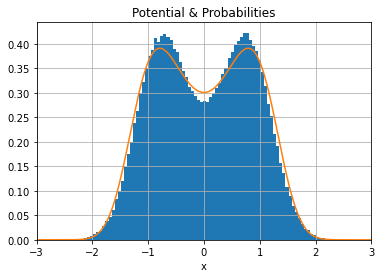

In [8]:
plt.hist(sample, bins=100, density=True);
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])
plt.plot(x,(psi[0])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.show()

### <span style="color:red">Exercise 08.3 - To be completed by master's students only.</span>

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

Compare your results with those obtained with your VMC code. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case? Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.

### <span style="color:orange">Solution

Below I show the projected **constant** trial wavefunction calculated with with the PIGS algorithm at different imaginary time propagations $\tau$.

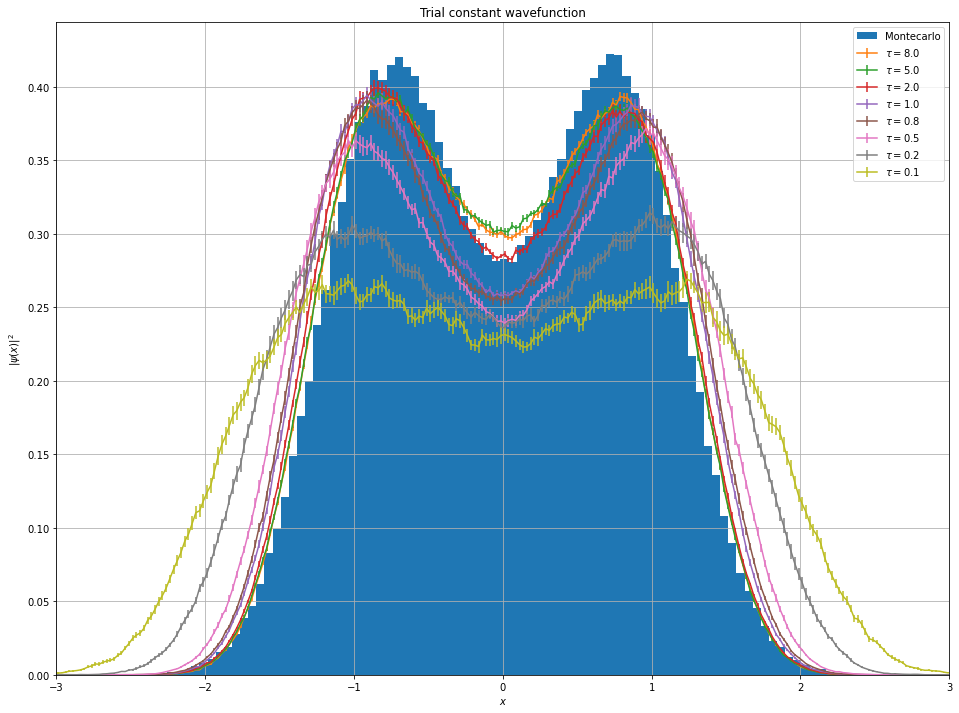

In [9]:
plt.figure(figsize=(16, 12))
plt.hist(sample, bins=100, density=True, label="Montecarlo");
for tau in (8., 5., 2., 1., 0.8, 0.5, 0.2, 0.1):
    trial_pigs_prob = np.loadtxt(f"data/lab08/ex08.3/pigs_trial_{tau}_probability.out")
    plt.errorbar(trial_pigs_prob[:,0], trial_pigs_prob[:,1], yerr=trial_pigs_prob[:,2], label=f"$\\tau = {tau}$");
plt.legend()
plt.title("Trial constant wavefunction")
plt.xlabel("$x$")
plt.ylabel("$|\psi(x)|^2$")
plt.grid(True)
plt.xlim((-3,3))
plt.show()

I conclude that the imaginary time propagation $\tau$ cannot be reduced arbitrarily, since it starts to have issues for $\tau\le 1.0$

Below I show the projected previous **wavefunction $\psi_{\mu,\sigma}$**, with minimizing parameters, calculated with the PIGS algorithm at different imaginary time propagations $\tau$.

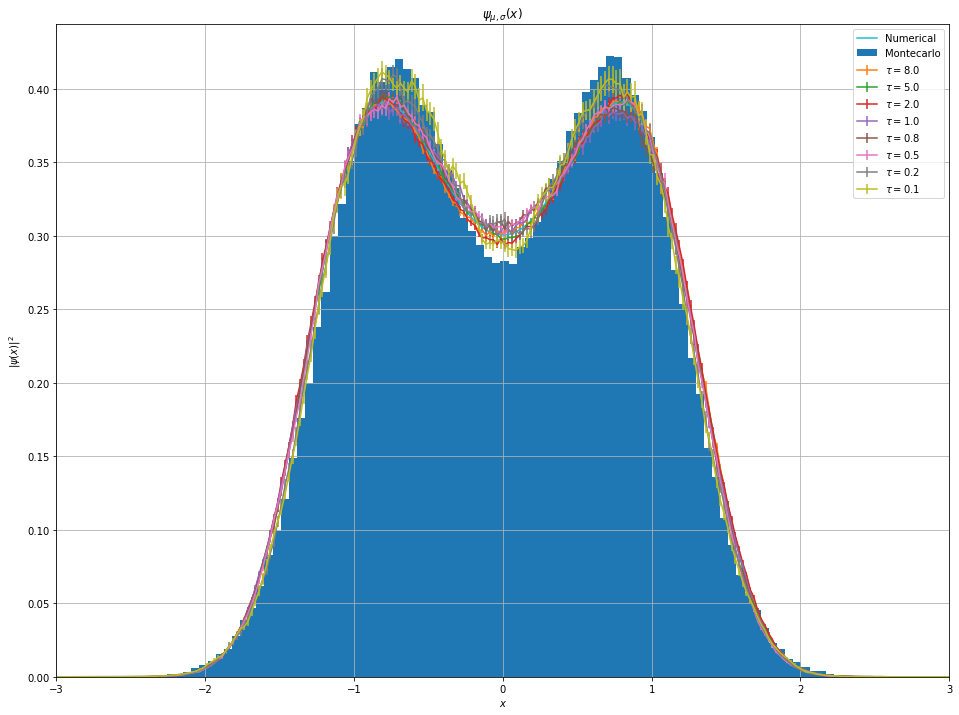

In [10]:
psi_pigs_prob = []
plt.figure(figsize=(16, 12))

plt.hist(sample, bins=100, density=True, label="Montecarlo");
for tau in (8., 5., 2., 1., 0.8, 0.5, 0.2, 0.1):
    psi_pigs_prob = np.loadtxt(f"data/lab08/ex08.3/pigs_psi_{tau}_probability.out")
    plt.errorbar(psi_pigs_prob[:,0], psi_pigs_prob[:,1], yerr=psi_pigs_prob[:,2], label=f"$\\tau = {tau}$");

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label="Numerical")
plt.legend()
plt.title("$\psi_{\mu, \sigma}(x)$")
plt.xlabel("$x$")
plt.ylabel("$|\psi(x)|^2$")
plt.grid(True)
plt.xlim((-3,3))

plt.show()

Note that, this time, all our choices of $\tau$ produce a good output.

Below I show the projected previous **wavefunction $\psi_{\mu,\sigma}$**, with minimizing parameters, at different temperatures $T$.

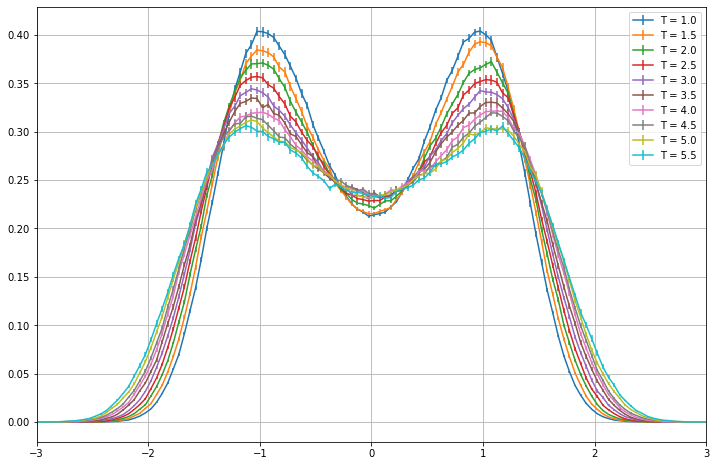

In [11]:
plt.figure(figsize=(12, 8))
pimc_psi_prob = []
for i in range(10):
    temperature = 1. + i * 0.5
    pimc_psi_prob = np.loadtxt(f"data/lab08/ex08.3/pimc_psi_{temperature:.1f}_probability.out")
    plt.errorbar(pimc_psi_prob[:, 0], pimc_psi_prob[:, 1], yerr=pimc_psi_prob[:, 2], label=f"T = {temperature}")
plt.grid()
plt.legend()
plt.xlim((-3,3))
plt.show()